Right way to get the correlation function covariance (used in fig. 5). Please cite https://arxiv.org/abs/1611.00752 if you use these results.

In [1]:
from imaster_paper_args import *

In [7]:
test=False#if true, run test case to make sure code runs.

In [8]:
nside=1024
if test:
    nside=64
use_window=True
unit_window=False
f_sky=0.3

do_pseudo_cl=False
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=False
use_binned_theta=False

do_cov=True

In [9]:
z0=1 #1087
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,unit_window=unit_window)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 273 3072 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:922: MatplotlibDepr

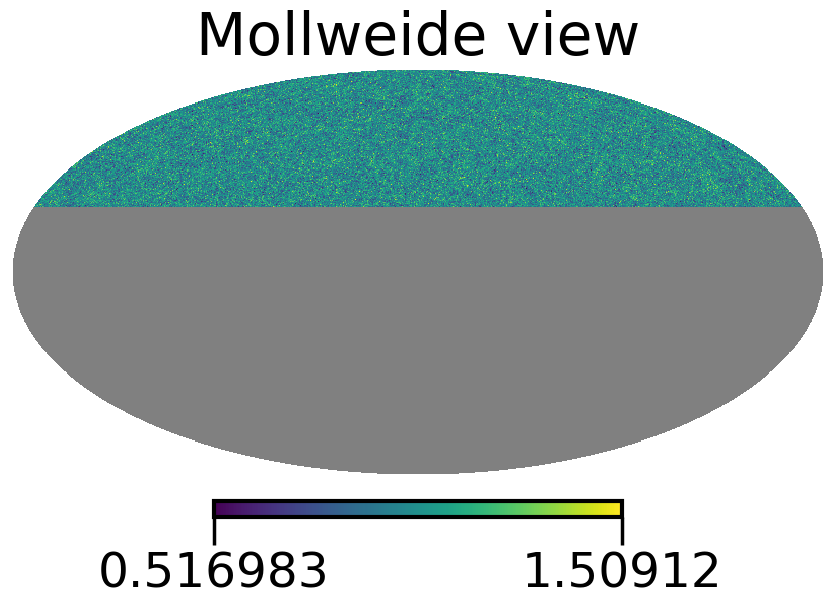

In [10]:
hp.mollview(shear_zbins[0]['window'])

In [11]:
corrs=[corr_gg]#corr_ll,corr_gg,corr_ggl]

In [12]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=(2,2)

In [13]:
#setup parameters
lmax_cl=5000
if test:
    lmax_cl=3*nside-1
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

window_lmax=min(lmax_cl,3*nside-1)

lmin_cl_Bins=lmin_cl+2
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
if test:
    Nl_bins2=10
l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=50)#,binning_mode='decreasing')
# l_bins=l_bins[l_bins<=lmax_cl_Bins]
# l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
lb_xi=lb*1.
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [65]:
do_xi=True

theta_min=0.1/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max=1200./60
n_theta_bins=51
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*80)
theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)

#Hankel Transform setup
WT_kwargs={'l':l0,'l_cut_weights':np.ones_like(l0),'theta':th*d2r,'s1_s2':[(0,0)], #(2,2),(2,-2)
           'wig_d_taper_order_low':16,'wig_d_taper_order_high':20}
# if globals().get('WT') is None:
WT=wigner_transform(**WT_kwargs )
# WT_b=wigner_transform(**WT_kwargs)
WT_b=WT
WT.gather_data()

Wigner ell max of  4999  too low for theta_min. Recommendation based on first few zeros of bessel  (0, 0)  : [ 82671.8129527  189766.30698117 297493.25187861 405363.09440321
 513287.1413721 ]


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:120: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:120: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:120: RuntimeWarning: invalid value encountered in cos


l_cut_coupling: (4080, 4080) (4080,) (4080, 4080)
Scattering WT data 1


In [66]:
mask=shear_zbins[0]['window']!=hp.UNSEEN
shear_zbins[0]['window'][mask].mean()

0.9991190767834063

8.904882318570365e-16


[]

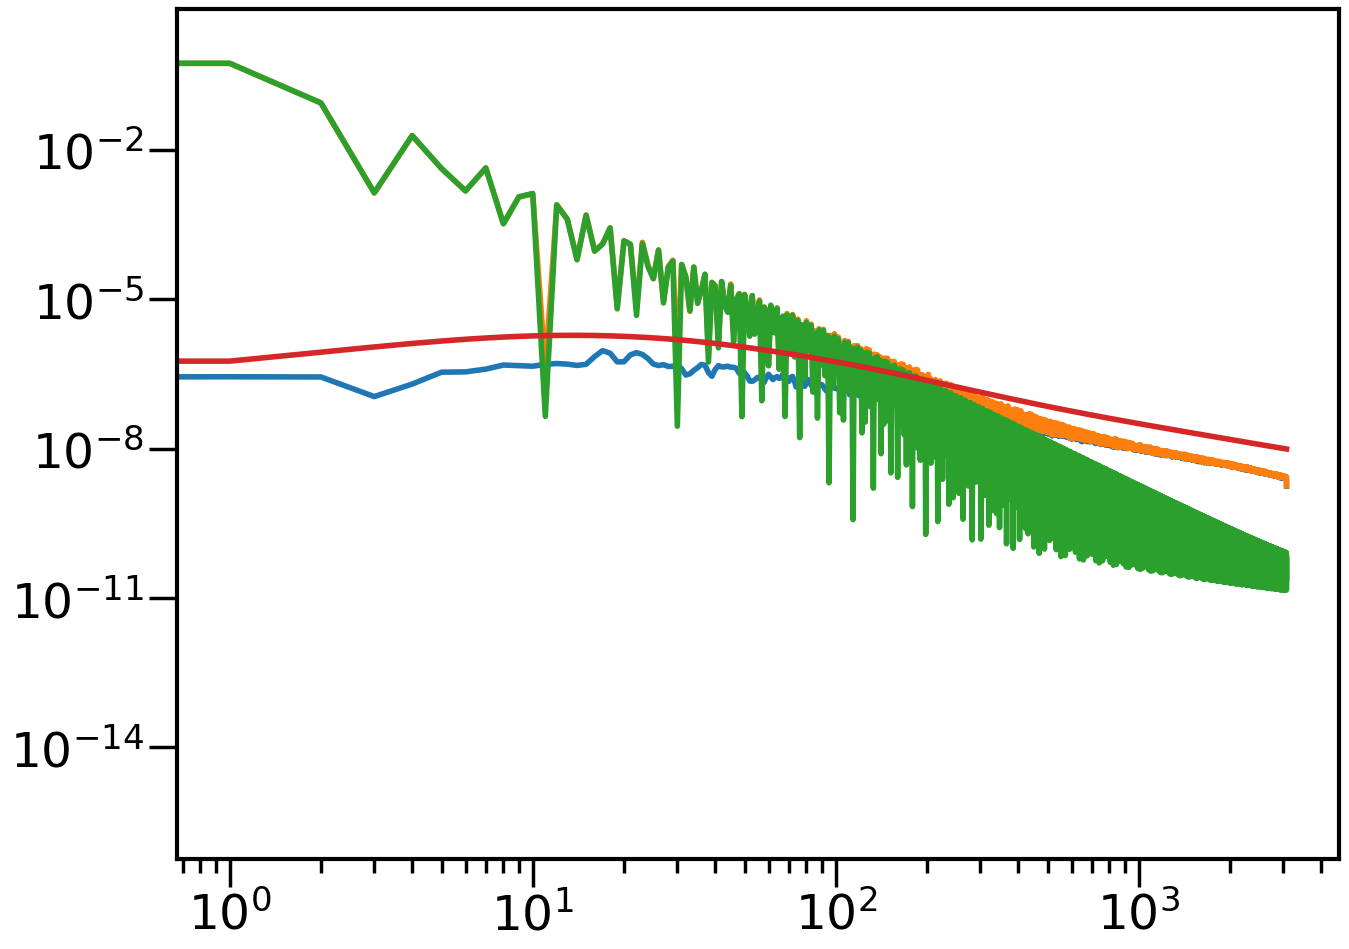

In [67]:
mask=shear_zbins[0]['window']!=hp.UNSEEN
ww=shear_zbins[0]['window']-shear_zbins[0]['window'][mask].mean()
ww[~mask]=hp.UNSEEN
print(ww[mask].mean())
wlt00=hp.anafast(shear_zbins[0]['window'])
wlt0=hp.anafast(ww)
mlt0=hp.anafast(mask)

plot(wlt0)
plot(wlt00)
plot(mlt0)
plot(shear_zbins[0]['window_cl0'])
loglog()

In [68]:
l0w=np.arange(len(wlt0))

[]

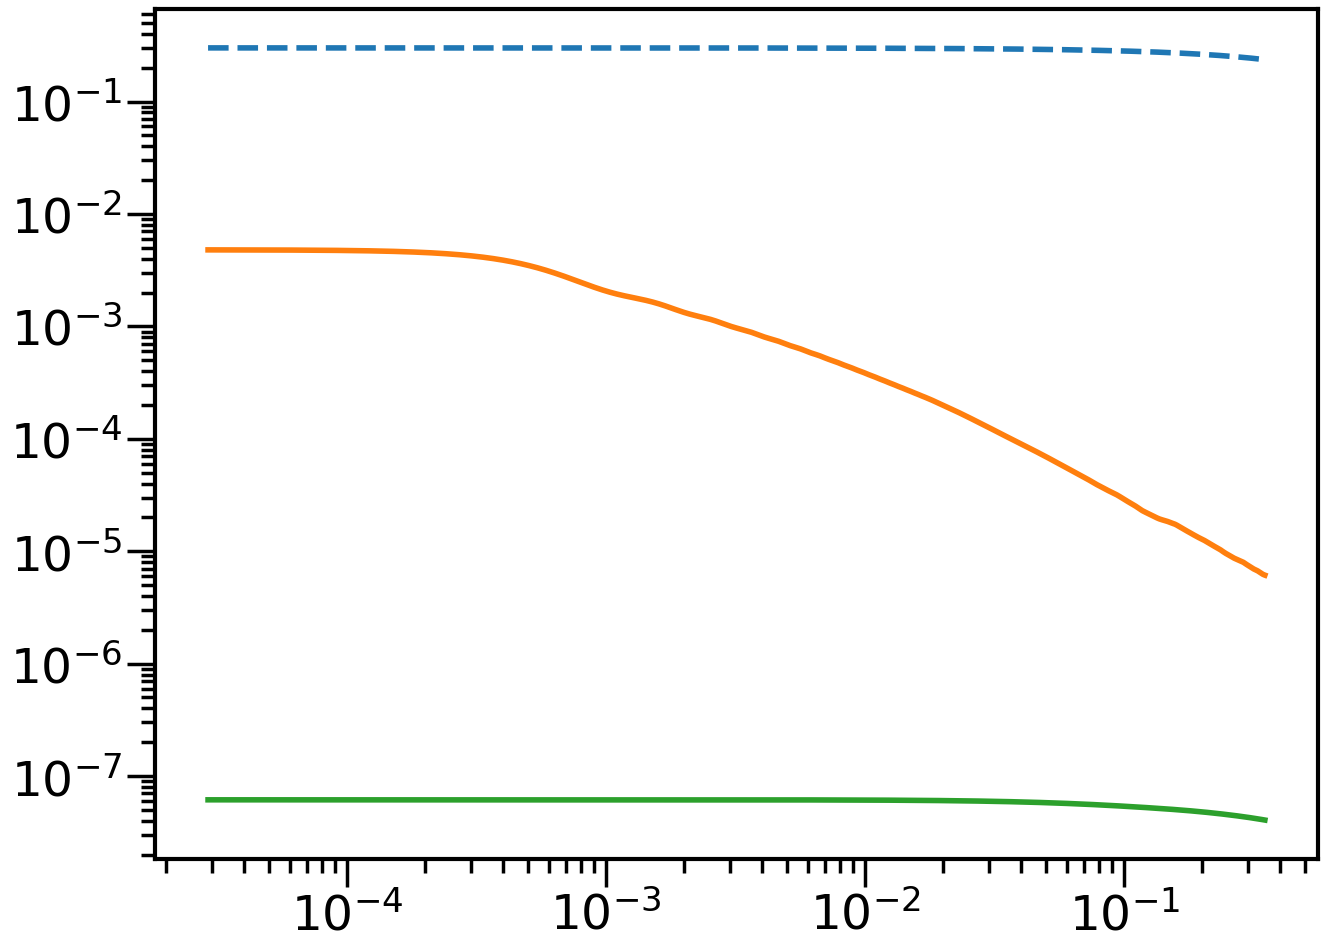

In [69]:
th,cc0=WT.projected_covariance(l_cl=l0w,cl_cov=mlt0,s1_s2=(0,0))
th,cc1=WT.projected_covariance(l_cl=l0w,cl_cov=mlt0*wlt0,s1_s2=(0,0))
th,cc2=WT.projected_covariance(l_cl=l0w,cl_cov=wlt0,s1_s2=(0,0))
th,cc3=WT.projected_covariance(l_cl=l0w,cl_cov=wlt0*wlt0,s1_s2=(0,0))

plot(th,np.diag(cc0),'--')
plot(th,np.diag(cc2),'-')
plot(th,np.diag(cc1),'-')
loglog()

[]

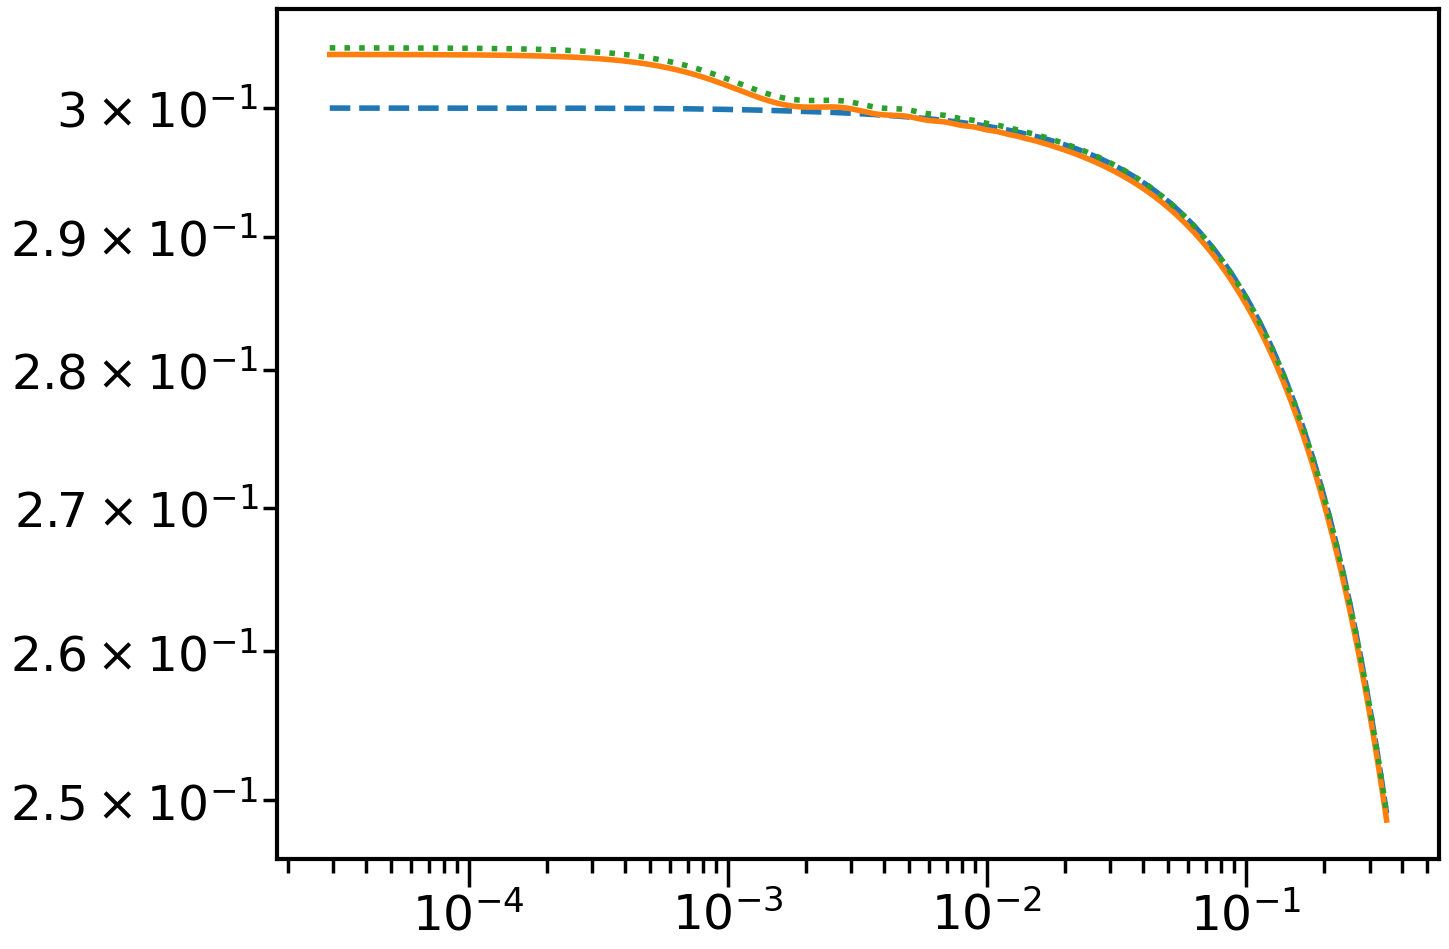

In [70]:
th,c0=WT.projected_correlation(l_cl=l0w,cl=mlt0,s1_s2=(0,0))
th,c00=WT.projected_correlation(l_cl=l0w,cl=wlt00,s1_s2=(0,0))
th,c1=WT.projected_correlation(l_cl=l0w,cl=wlt0,s1_s2=(0,0))
plot(th,c0,'--')
plot(th,c00)
plot(th,c1+c0,':')
loglog()

In [71]:
client

Client Scheduler: tcp://127.0.0.1:46709 Dashboard: http://127.0.0.1:8811/status,Cluster Workers: 2 Cores: 2 Memory: 240.00 GB


In [72]:
Skylens_kwargs=parse_dict(locals())
Skylens_kwargs['do_pseudo_cl']=False
SL_xi0=Skylens(**Skylens_kwargs)

Tracer utils has tracers:  ['shear', 'galaxy']


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 100 5000 3072.0 2
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.00015997886657714844
set window_cl: cl done 3.3255672454833984 523.788 0.001
Win_cli ('galaxy', 'galaxy', 0, 0) ('galaxy', 'galaxy') (0, 0)
set window_cl: cl done 3.9658806324005127 523.788 0.001
cl+cov bags done 1 1 4.4641242027282715
set_window_cl done 748.8455674648285
Got xi win graph
Window done. Size: 1598.188


In [102]:
Skylens_kwargs_nW=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_nW['use_window']=False
SL_xi0_nW=Skylens(**Skylens_kwargs_nW)

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 5.015
power spectra camb_pk_too_many_z
Win gen: step size 100 5000 3072.0 2
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


In [74]:
cl_bu=client.gather(SL_xi0.cl_bin_utils)
xi_bu=client.gather(SL_xi0.xi_bin_utils)

In [75]:
%time xiHG0=SL_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()
%time xi0=client.compute(xiHG0['xi']).result()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
Done xi graph 0.000847 296.875
CPU times: user 26.2 s, sys: 3.01 s, total: 29.2 s
Wall time: 6.86 s
CPU times: user 1.05 s, sys: 5.2 s, total: 6.25 s
Wall time: 17.2 s
CPU times: user 92.6 ms, sys: 405 ms, total: 498 ms
Wall time: 716 ms


In [76]:
%time xiHG0_nW=SL_xi0_nW.xi_tomo()
%time xiH0_nW=xiHG0_nW['stack'].compute()
%time xi0_nW=client.compute(xiHG0_nW['xi']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
Done xi graph 0.000847 296.94
CPU times: user 25.2 s, sys: 3.08 s, total: 28.3 s
Wall time: 6.04 s
CPU times: user 268 ms, sys: 1.09 s, total: 1.36 s
Wall time: 3.1 s
CPU times: user 88 ms, sys: 300 ms, total: 388 ms
Wall time: 683 ms


In [77]:
%time clG0_nW=SL_xi0_nW.cl_tomo()
%time cl0_nW=client.compute(clG0_nW['cl_b']).result()
%time pcl0_nW=client.compute(clG0_nW['stack']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
CPU times: user 207 ms, sys: 782 ms, total: 988 ms
Wall time: 1.83 s
CPU times: user 22.2 ms, sys: 3.05 ms, total: 25.2 ms
Wall time: 53.9 ms
CPU times: user 189 ms, sys: 685 ms, total: 874 ms
Wall time: 2.24 s


In [78]:
%time xi_clG0=SL_xi0.cl_tomo()
%time xi_cl0=client.compute(xi_clG0['cl']).result()
# %time xi_pcl0=client.compute(xi_clG0['stack']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
CPU times: user 219 ms, sys: 984 ms, total: 1.2 s
Wall time: 2.48 s
CPU times: user 23.2 ms, sys: 999 µs, total: 24.2 ms
Wall time: 40.2 ms


In [79]:
def get_err(cov):
    return np.sqrt(np.diag(cov))
def corr_mat(cov):
    err=get_err(cov)
    return cov/np.outer(err,err)

def matrix_cut(mat=[],x=[]):
    m=mat[x]
    N=sum(x)
    m2=np.zeros((N,N))
    j=0
    for i in m:
        m2[j]=i[x]
        j=j+1
    return m2

def SN_cum(cov=[],lb=[],cl=[],diag=False,lmin=0,lmax=1e4,use_hartlap=False,nsim=1000):
    sni=np.zeros_like(lb)
    for i in np.arange(len(lb)):
        if lb[i]<lmin or lb[i]>lmax:
            continue
        x=lb<=lb[i]
        x*=lb>lmin
        cov2_cut=matrix_cut(mat=cov,x=x)
        if diag:
            cov2_cut=np.diag(np.diag(cov2_cut))
        cov2_cut_inv=np.linalg.inv(cov2_cut)
        
        cl_i=cl[x]
        SN2=cl_i@cov2_cut_inv@cl_i
        if use_hartlap:
            SN2*=(nsim-2-x.sum())/(nsim-1)
        sni[i]=SN2
    return np.sqrt(sni)

In [80]:
SL_xi0.Win['cl'][corr_gg][bi]['xi'],SL_xi0.Win['cov'][corr_gg+corr_gg][bi+bi]['f_sky12'],SL_xi0.Win['cov'][corr_gg+corr_gg][bi+bi]['f_sky1234']

(array([0.30423762, 0.30423761, 0.3042376 , ..., 0.24892981, 0.2488135 ,
        0.24869694]),
 0.2999999523162842,
 0.2999999523162842)

In [81]:
np.diag(SL_xi0.Win['cov'][corr_gg+corr_gg][bi+bi]['xi_cov'][1324]['clcl'])/SL_xi0.Win['cl'][corr_gg][bi]['xi']

array([1.08045264, 1.08045217, 1.08045169, ..., 0.94850662, 0.94836897,
       0.94823094])

In [82]:
np.diag(SL_xi0.Win['cov'][corr_gg+corr_gg][bi+bi]['xi_cov'][1324]['clcl'])/SL_xi0.Win['cl'][corr_gg][bi]['xi']**2

array([3.55134458, 3.55134318, 3.55134179, ..., 3.81033764, 3.81156552,
       3.81279699])

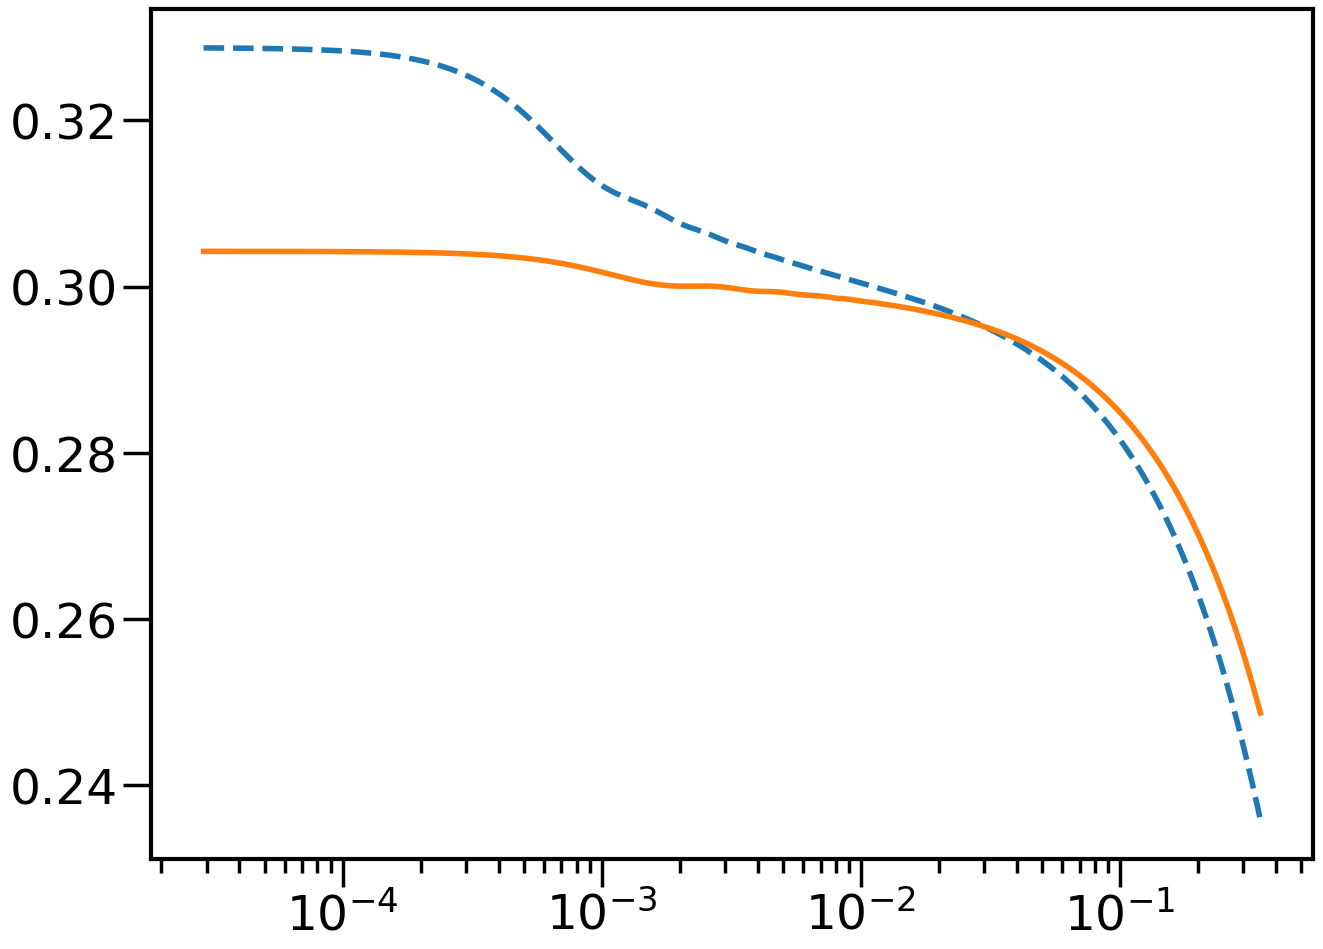

In [83]:
plot(th,np.diag(SL_xi0.Win['cov'][corr_gg+corr_gg][bi+bi]['xi_cov'][1324]['clcl']),'--')
plot(th,SL_xi0.Win['cl'][corr_gg][bi]['xi'])
xscale('log')

In [84]:
th*60

array([1.74532925e-03, 1.74935283e-03, 1.75338568e-03, ...,
       2.08477180e+01, 2.08957791e+01, 2.09439510e+01])

In [85]:
get_err(xiH0['cov'])/get_err(xiH0_nW['cov'])

array([1.03032532, 1.03030541, 1.03027671, 1.03023529, 1.03017552,
       1.03008938, 1.02996536, 1.02978713, 1.02953169, 1.029167  ,
       1.02864938, 1.0279211 , 1.0269101 , 1.02553561, 1.02372786,
       1.02147438, 1.01890321, 1.01637898, 1.01449813, 1.01378265,
       1.01404026, 1.01407555, 1.01291404, 1.01128441, 1.00986155,
       1.0090712 , 1.00869013, 1.00772956, 1.00728207, 1.0067162 ,
       1.00642563, 1.00615728, 1.00604769, 1.00607711, 1.00627276,
       1.0066072 , 1.00710534, 1.00776853, 1.00864455, 1.00977954,
       1.01122977, 1.01303091, 1.01524303, 1.01796184, 1.02127436,
       1.02528472, 1.03016275, 1.03609722, 1.04332901, 1.05222274,
       1.06332487])

In [104]:
SN_nw=SN_cum(cov=xiH0_nW['cov'],cl=xiH0_nW['xi'],lb=thb,lmin=.1)
SN0=SN_cum(cov=xiH0['cov'],cl=xiH0['xi'],lb=thb,lmin=.1)

In [105]:
SN_nw

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 151.18316344, 353.23932453,
       367.37213335, 396.82746343, 397.03084281, 400.88401562,
       401.14106645, 402.04335602, 402.27581958, 402.37170619,
       402.41521928, 402.44629869, 402.45709762, 402.46392116,
       402.46743044, 402.46940567, 402.47039953, 402.47073588,
       402.4707808 , 402.47078569, 402.47083806, 402.47092064,
       402.47102585, 402.47134563, 402.47139987, 402.47158043,
       402.47175678, 402.47187872, 402.47201875])

[]

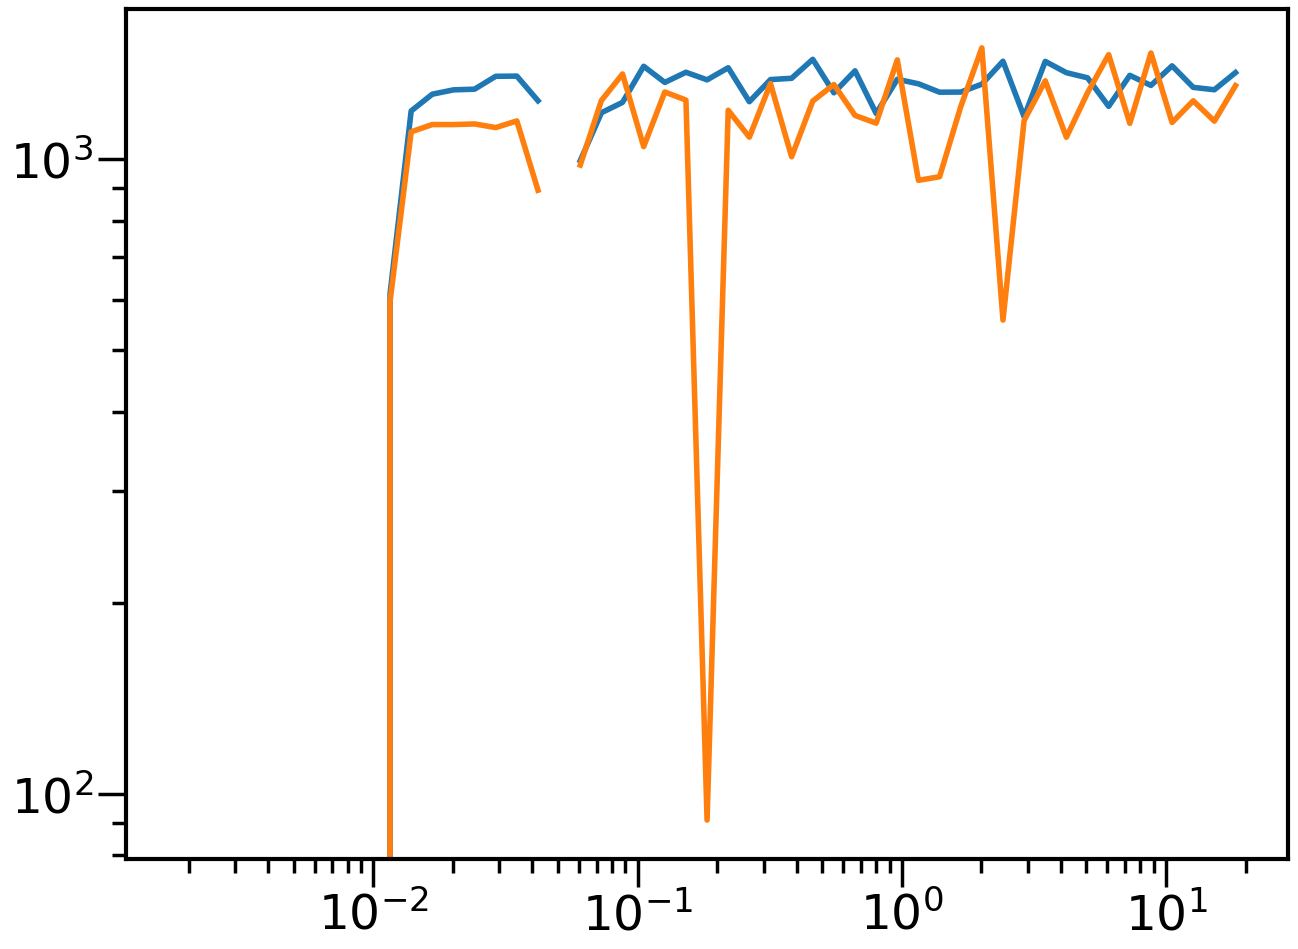

In [101]:
plot(thb,SN_nw)
plot(thb,SN0)
loglog()

[]

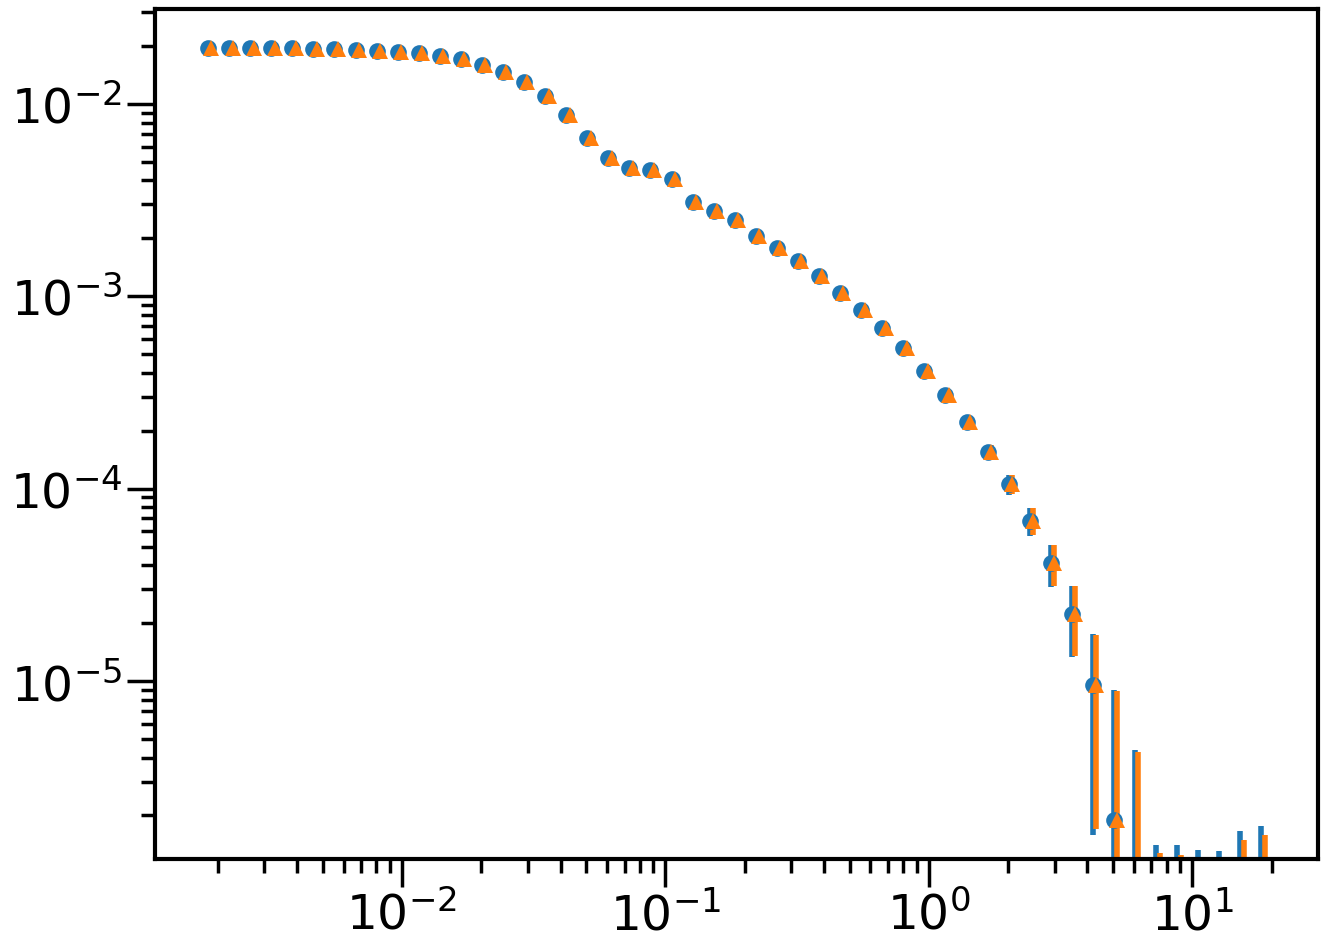

In [88]:
errorbar(thb,xiH0['xi'],get_err(xiH0['cov']),fmt='o')
errorbar(thb*1.03,xiH0_nW['xi'],get_err(xiH0_nW['cov']),fmt='^')
# errorbar(lb,f*cl_xi,f*get_err(cl_xi_cov),fmt='co')
loglog()

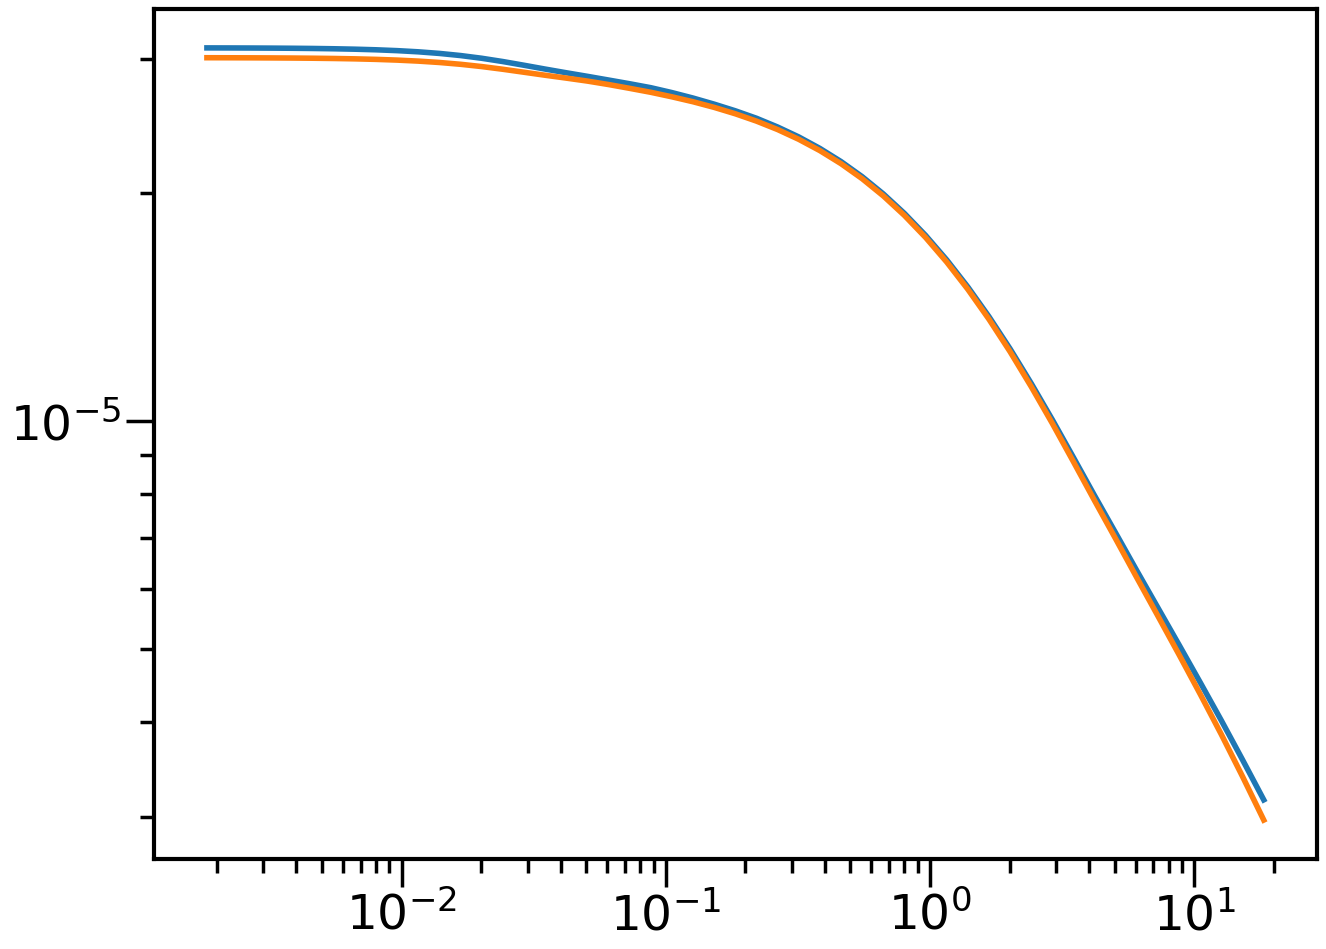

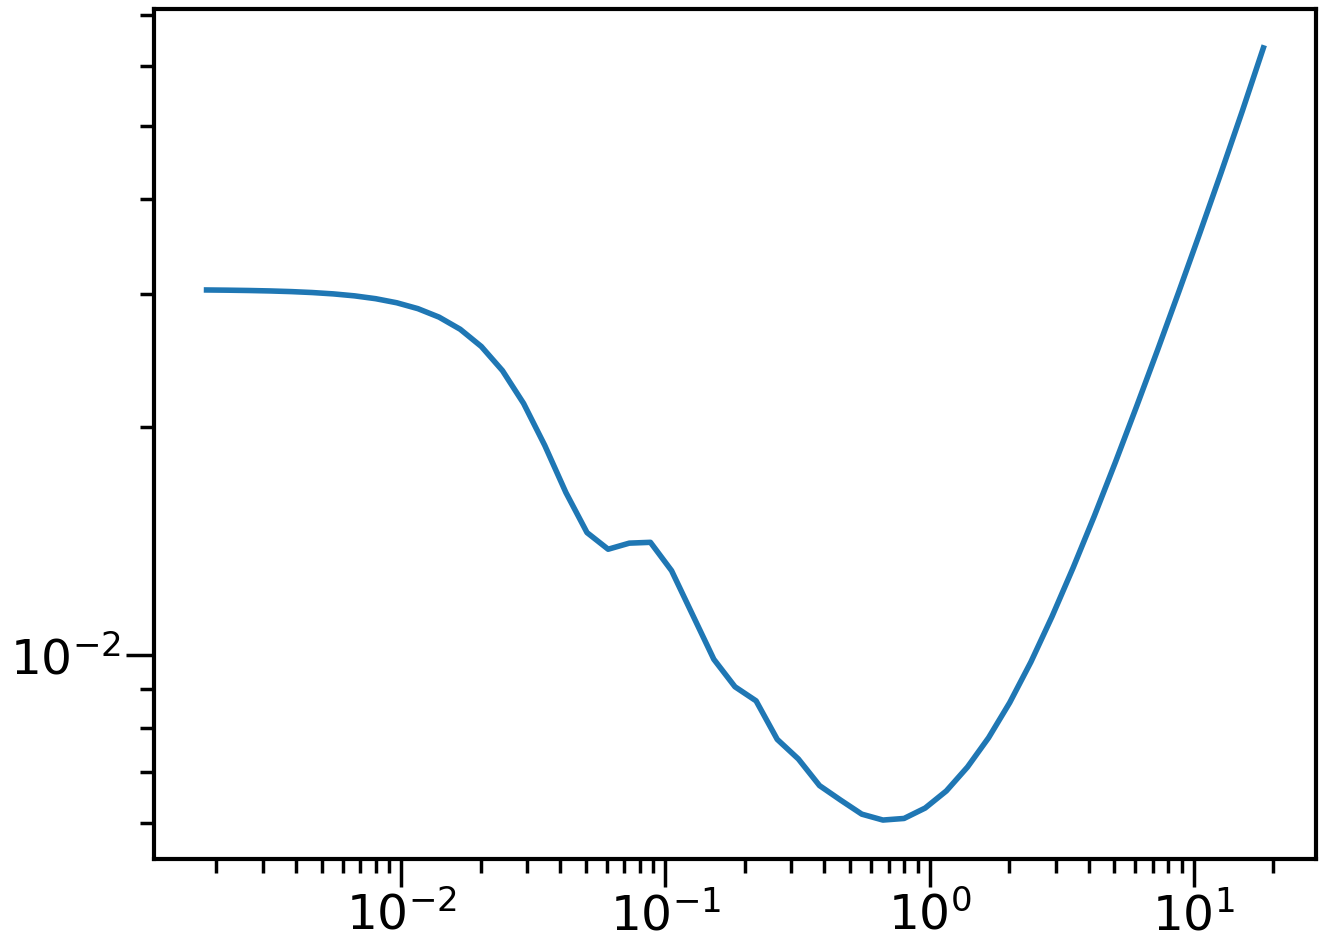

In [89]:
plot(thb,get_err(xiH0['cov']))
plot(thb,get_err(xiH0_nW['cov']))
# errorbar(lb,f*cl_xi,f*get_err(cl_xi_cov),fmt='co')
loglog()
show()
plot(thb,get_err(xiH0['cov'])/get_err(xiH0_nW['cov'])-1)
loglog()
show()


<ipython-input-90-a6d62d530189>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(thb,thb,corr_mat(xiH0['cov']),vmin=-1,vmax=1,cmap='seismic')


[]

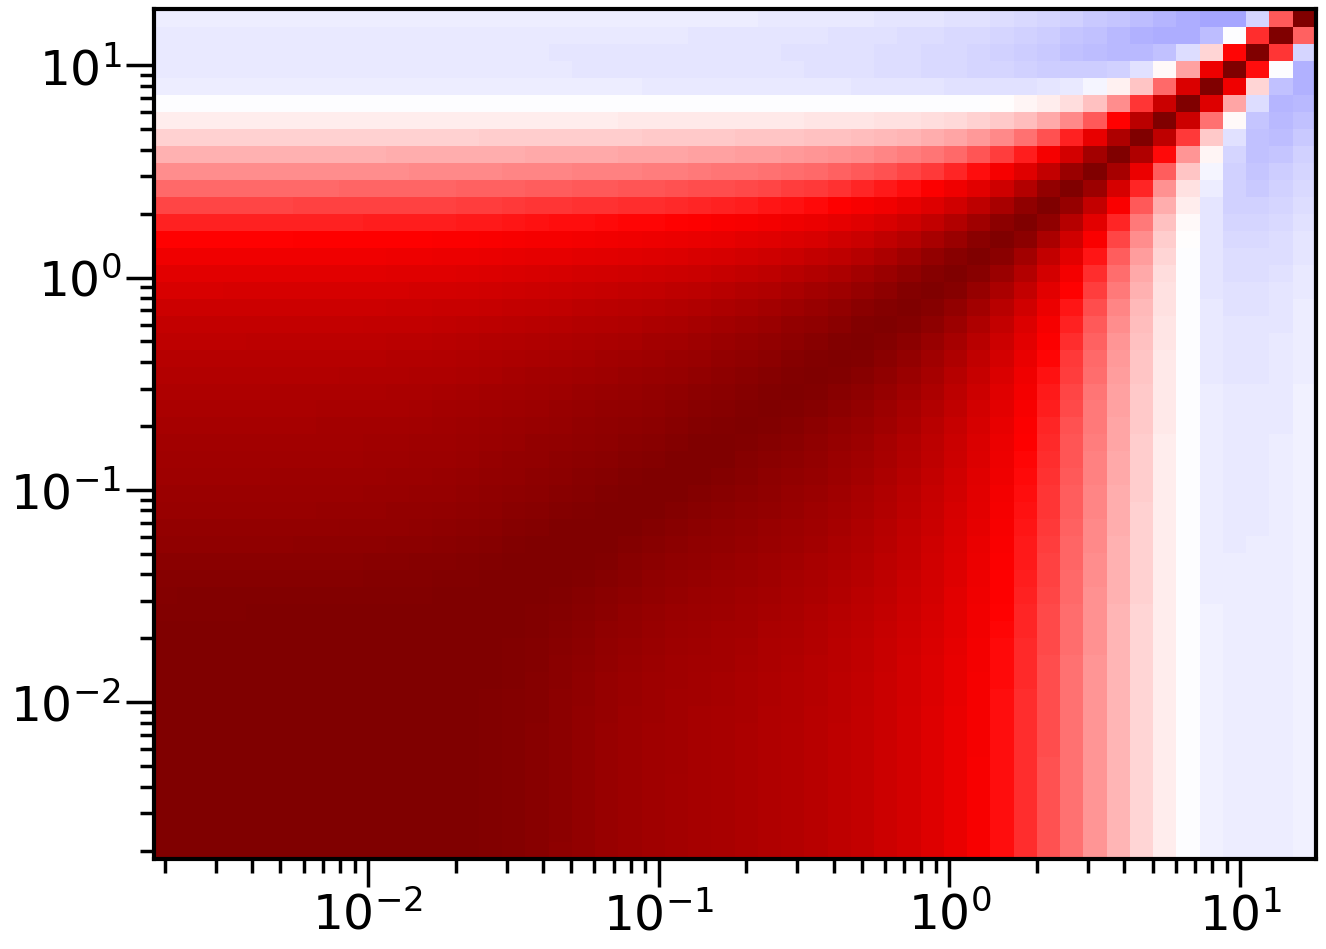

In [90]:
pcolor(thb,thb,corr_mat(xiH0['cov']),vmin=-1,vmax=1,cmap='seismic')
loglog()

<ipython-input-91-647ff6566f59>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(thb,thb,corr_mat(xiH0_nW['cov']),vmin=-1,vmax=1,cmap='seismic')


[]

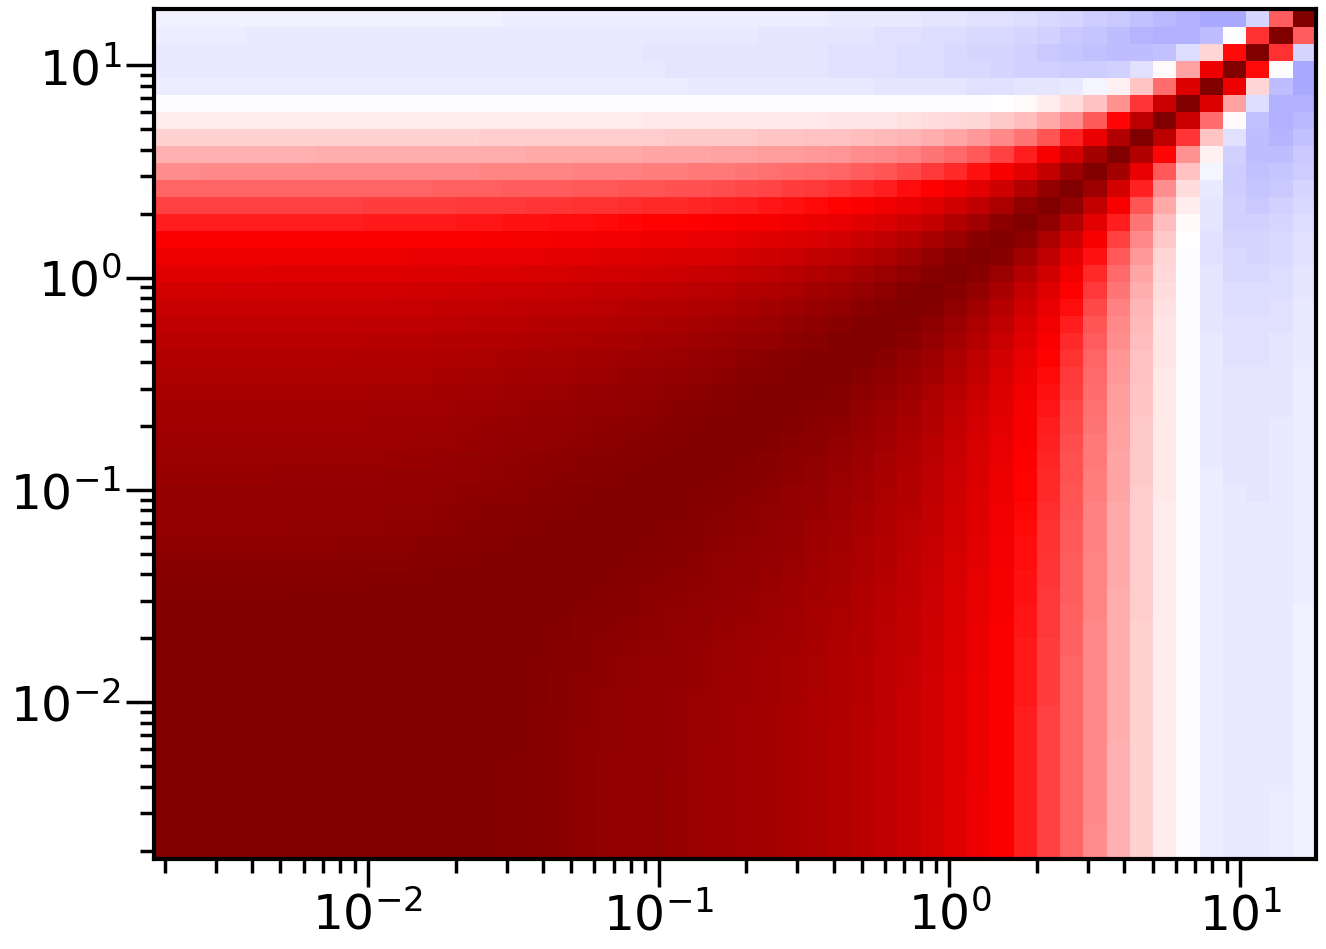

In [91]:
pcolor(thb,thb,corr_mat(xiH0_nW['cov']),vmin=-1,vmax=1,cmap='seismic')
loglog()

<ipython-input-92-53014fb1d63f>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(thb,thb,corr_mat(xiH0_nW['cov'])-corr_mat(xiH0['cov']),vmin=-.1,vmax=.1,cmap='seismic')


[]

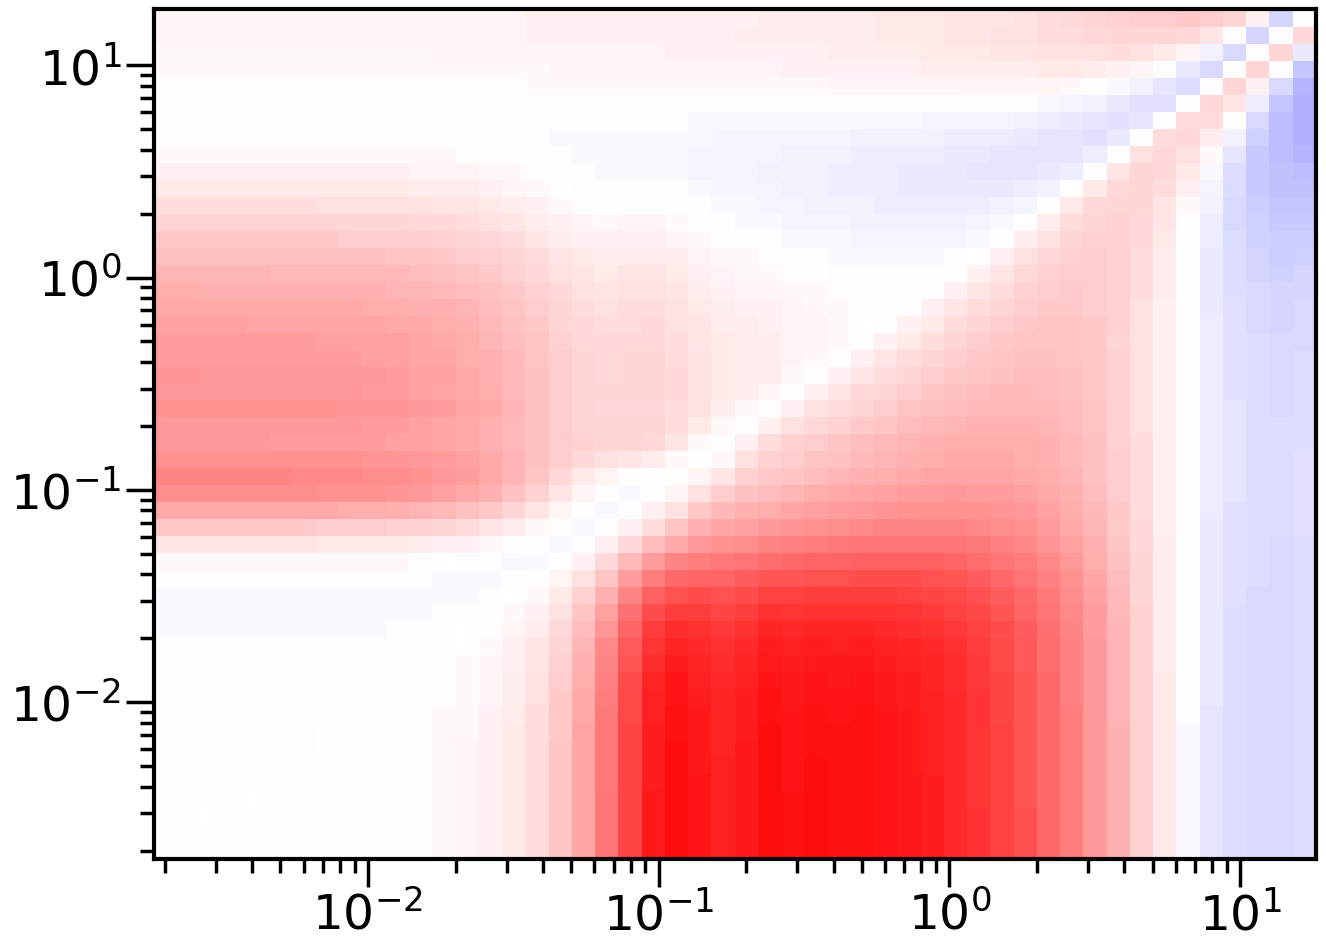

In [92]:
pcolor(thb,thb,corr_mat(xiH0_nW['cov'])-corr_mat(xiH0['cov']),vmin=-.1,vmax=.1,cmap='seismic')
loglog()

In [93]:
def bin_2d(cov=[],bin_utils=None):
    #r_dr=bin_utils['r_dr']
    #cov_r_dr=cov*bin_utils['r_dr_m'][2]#np.outer(r_dr,r_dr)
    binning_mat=bin_utils['binning_mat']
    cov*bin_utils['r_dr_m'][2]
    cov_b=np.dot(binning_mat.T, np.dot(cov*bin_utils['r_dr_m'][2],binning_mat) )
    cov_b/=bin_utils['norm_m'][2]
    return cov_b


In [94]:
np.diag(xiH0_ub['cov']/xi_cov22)

NameError: name 'xiH0_ub' is not defined

In [ ]:
plot(thb,get_err(xiH0_ub['cov']))
plot(thb,get_err(xi_cov22),'--')
plot(thb,get_err(xi_cov2),':')
loglog()

In [ ]:
SL_xi0_ub.cov_utils.sample_variance_f